# Запрос к базе данных и сохранение обработаной информации в csv-файл

## Запрос

***Сделаем запрос и сохраним в переменной "dash_visits"***

In [3]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': '*****', # пароль
            'host': '*****.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': '*****-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

query = ''' SELECT *
            FROM dash_visits
        '''

dash_visits = pd.io.sql.read_sql(query, con = engine)

In [4]:
dash_visits

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


## Проверка данных

In [5]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
record_id       30745 non-null int64
item_topic      30745 non-null object
source_topic    30745 non-null object
age_segment     30745 non-null object
dt              30745 non-null datetime64[ns]
visits          30745 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


***Данные целостные и с типами всё в порядке.***

**Проверим дубликаты:**

In [7]:
dash_visits.duplicated().sum()

0

***Дубликатов нет.***

**Теперь быстро проверим каждый столбец**

### ***Столбец 'record_id'***

In [13]:
dash_visits['record_id'].describe()

count    3.074500e+04
mean     1.055969e+06
std      8.875461e+03
min      1.040597e+06
25%      1.048283e+06
50%      1.055969e+06
75%      1.063655e+06
max      1.071341e+06
Name: record_id, dtype: float64

In [14]:
dash_visits['record_id'].nunique()

30745

***Все идентификаторы уникальны - кол-во уникальных 'record_id' равно кол-ву строк 30745.***

### **Проверим строковые столбцы 'item_topic','source_topic','age_segment'**

In [12]:
for column in ['item_topic','source_topic','age_segment']:
    print(dash_visits[column].value_counts())

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64
Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              12

### Столбец 'dt'

In [16]:
dash_visits['dt'].describe()

count                   30745
unique                     17
top       2019-09-24 18:58:00
freq                     3383
first     2019-09-24 18:28:00
last      2019-09-24 19:00:00
Name: dt, dtype: object

In [22]:
dash_visits['dt'].sort_values().unique()

array(['2019-09-24T18:28:00.000000000', '2019-09-24T18:29:00.000000000',
       '2019-09-24T18:30:00.000000000', '2019-09-24T18:31:00.000000000',
       '2019-09-24T18:32:00.000000000', '2019-09-24T18:33:00.000000000',
       '2019-09-24T18:34:00.000000000', '2019-09-24T18:35:00.000000000',
       '2019-09-24T18:52:00.000000000', '2019-09-24T18:53:00.000000000',
       '2019-09-24T18:54:00.000000000', '2019-09-24T18:55:00.000000000',
       '2019-09-24T18:56:00.000000000', '2019-09-24T18:57:00.000000000',
       '2019-09-24T18:58:00.000000000', '2019-09-24T18:59:00.000000000',
       '2019-09-24T19:00:00.000000000'], dtype='datetime64[ns]')

***Здесь все хорошо. Всего 17 значений интересно...***

### Столбец 'visits'

In [34]:
dash_visits['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

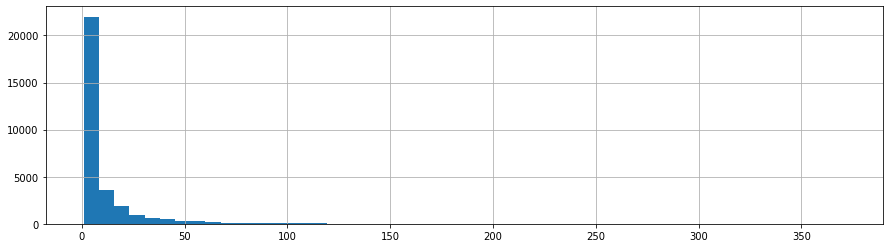

In [35]:
dash_visits['visits'].hist(bins=50, figsize=(15,4));

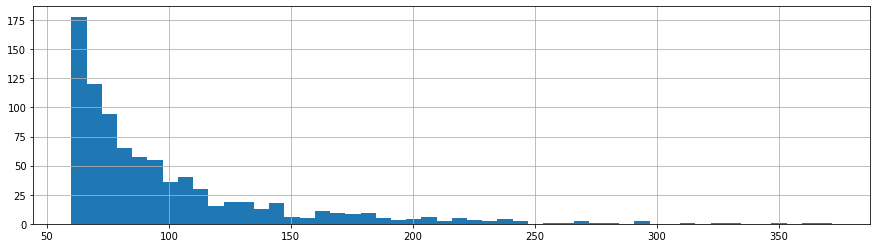

In [36]:
dash_visits['visits'].hist(bins=50, figsize=(15,4), range=(60,372));

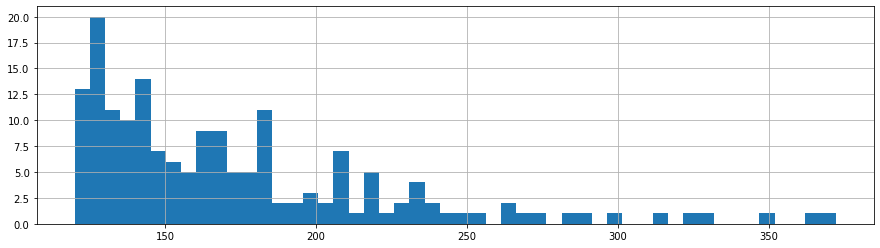

In [37]:
dash_visits['visits'].hist(bins=50, figsize=(15,4), range=(120,372));

***Есть большие значения (выбросы) до 371, подавляюще большинство значений расположено от от 1 до 25. Всё оставляем так как есть***

***Вывод: Данные целостные, типы в подходящие, дубликатов нет данные не требуют обработки. Единственное - были замечены большие значения в столбце "visits". Вся таблица оставлена для анализа без изменений.***

## Теперь экспортируем данные в csv-файл

In [38]:
dash_visits.to_csv('dash_visits.csv', index=False)

In [40]:
test_visits = pd.read_csv('dash_visits.csv')
test_visits

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


***Данные экспортированы успешно в файл - 'dash_visits.csv'.***